# Initialization of data

##### Note that we are using the top ten percent of the dataset that has the label: [Kdd_Cup_10_Percent.gz](https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## kddcup.names

In [2]:
with open ('data/kddcup.names','r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [5]:
# print

In [6]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

## kddcup.data_10_percent.gz

In [7]:
# kddcup.data_10_percent.gz
data_frame = pd.read_csv('data/kddcup.data_10_percent.gz', names= columns)
data_frame['Attack Type'] = data_frame.target.apply(lambda r:attacks_types[r[:-1]])
df = data_frame

<Axes: xlabel='Attack Type'>

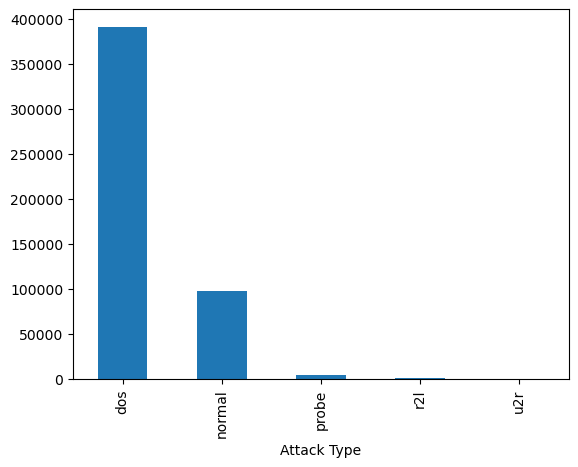

In [8]:
df['Attack Type'].value_counts().plot.bar()

In [9]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

num_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[num_cols] = StandardScaler().fit_transform(X[num_cols])

cat_cols = X.select_dtypes(include=['object']).columns
X[cat_cols] = X[cat_cols].apply(LabelEncoder().fit_transform)


In [12]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)


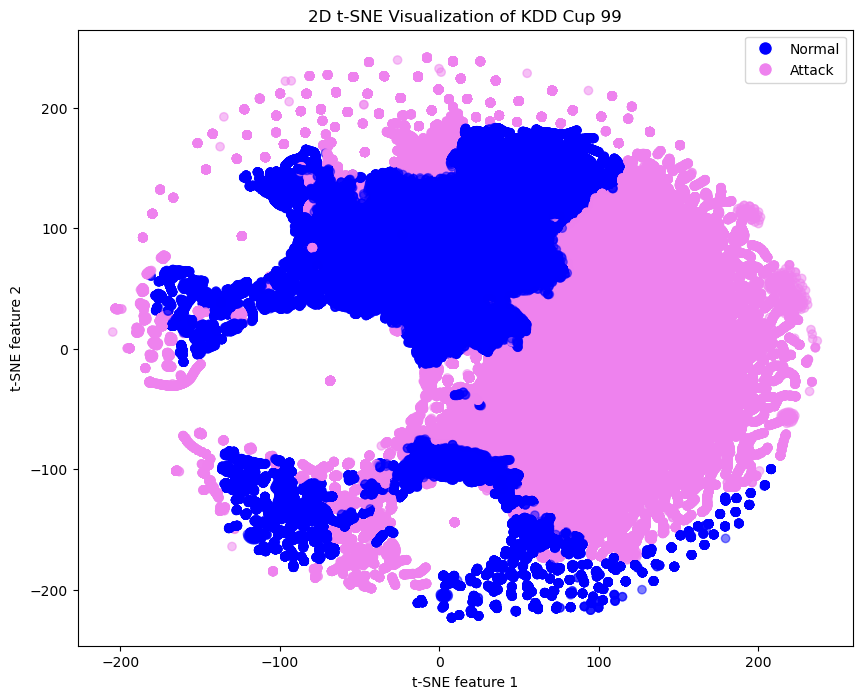

In [ ]:
import matplotlib.pyplot as plt

colors = ['blue' if attack_type == 'normal' else 'violet' for attack_type in y]
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, alpha=0.5)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Normal', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Attack', markersize=10, markerfacecolor='violet')]
plt.legend(handles=legend_elements)

plt.title('2D t-SNE Visualization of KDD Cup 99')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# 显示图形
plt.show()


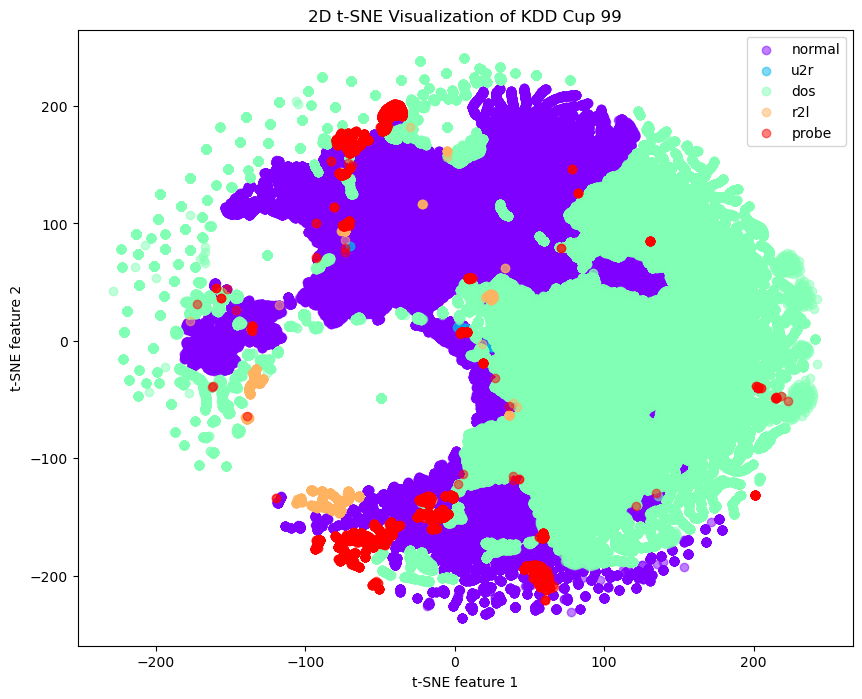

In [45]:
import matplotlib.pyplot as plt


unique_attack_types = y.unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_attack_types)))
attack_type_colors = dict(zip(unique_attack_types, colors))

plt.figure(figsize=(10, 8))
for attack_type, color in attack_type_colors.items():
    idx = y == attack_type
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], c=[color], label=attack_type, alpha=0.5)

plt.legend()
plt.title('2D t-SNE Visualization of KDD Cup 99')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_pca)


In [2]:


colors = ['#008000' if attack_type == 'normal' else '#800080' for attack_type in y]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=colors, alpha=0.5)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='#008000', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Attack', markerfacecolor='#800080', markersize=10)]
ax.legend(handles=legend_elements, title="Connection Type")

ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')
ax.set_title('3D t-SNE Visualization of KDD Cup 99')

plt.show()

NameError: name 'y' is not defined

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_attack_types = y.unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_attack_types)))
attack_type_colors = dict(zip(unique_attack_types, colors))

for attack_type, color in attack_type_colors.items():
    idx = y == attack_type
    ax.scatter(X_tsne_3d[idx, 0], X_tsne_3d[idx, 1], X_tsne_3d[idx, 2], c=[color], label=attack_type)

ax.legend()
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')
plt.title('3D t-SNE Visualization of KDD Cup 99')

plt.show()


: 

# DROP

In [4]:
import numpy as np


data = np.load('data/kdd_cup.npz')
kdd_data = data['kdd']

print("数据形状:", kdd_data.shape)
print("数据类型:", type(kdd_data))

if isinstance(kdd_data, np.ndarray) and kdd_data.dtype.names:
    print("字段名称:", kdd_data.dtype.names)



数据形状: (494021, 119)
数据类型: <class 'numpy.ndarray'>


In [8]:
data = kdd_data


if np.any(np.isnan(data)):
    data = np.nan_to_num(data) 

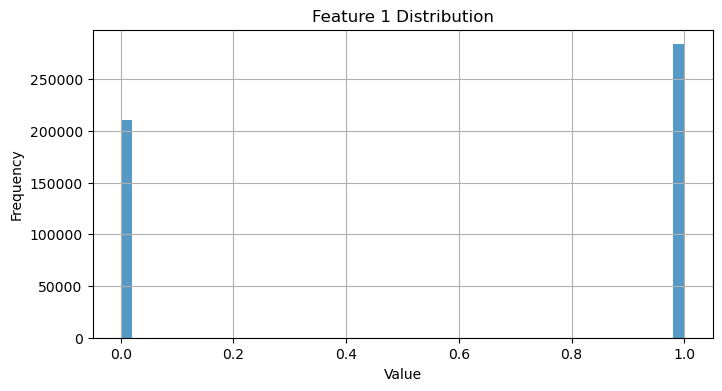

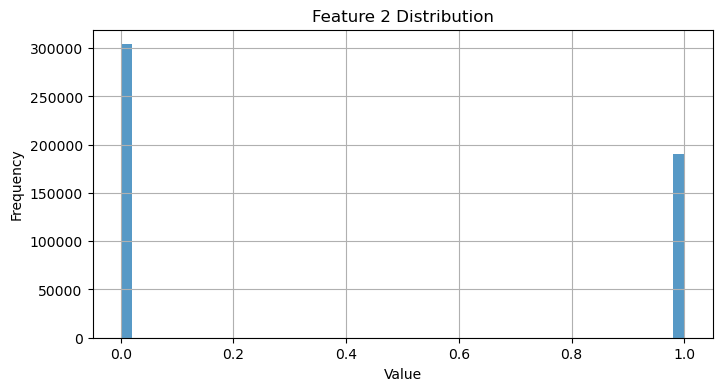

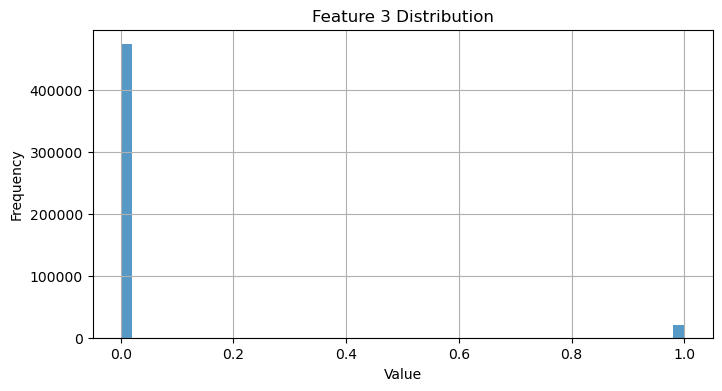

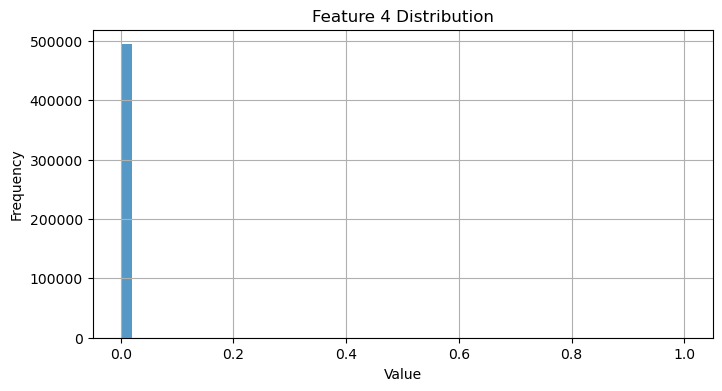

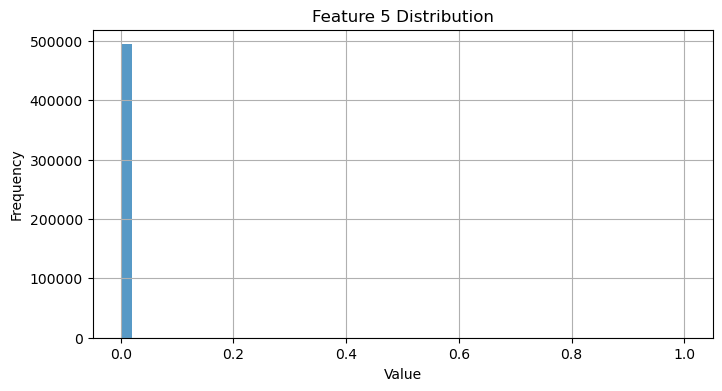

In [9]:
import matplotlib.pyplot as plt

for i in range(5):  
    plt.figure(figsize=(8, 4))
    plt.hist(data[:, i], bins=50, alpha=0.75)
    plt.title(f'Feature {i+1} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


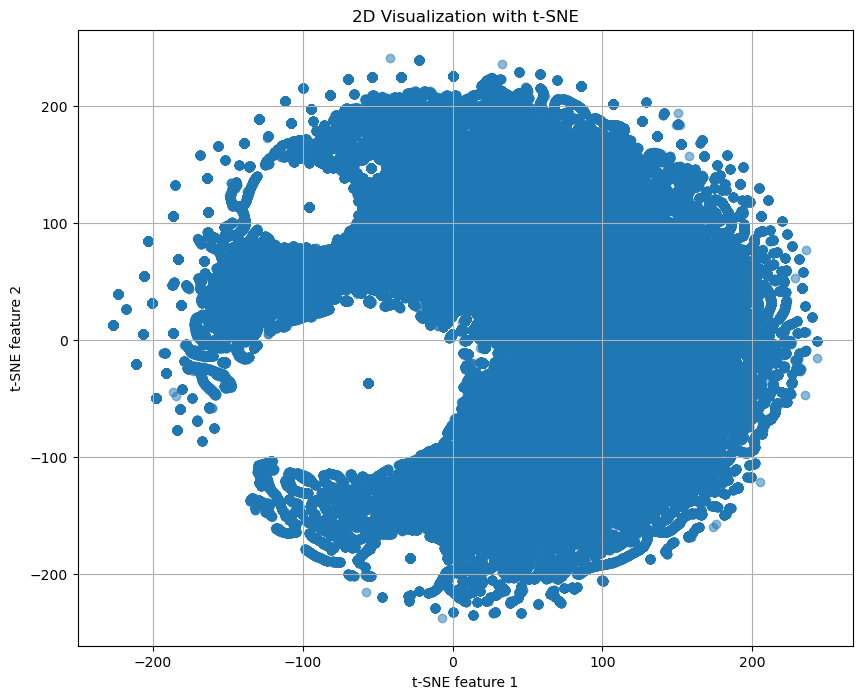

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)


tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_pca)


plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5)
plt.title('2D Visualization with t-SNE')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.grid(True)
plt.show()


In [1]:
import matplotlib.pyplot as plt

unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

label_colors = {label: color for label, color in zip(unique_labels, colors)}

plt.figure(figsize=(10, 8))
for label, color in label_colors.items():
    idx = labels == label
    plt.scatter(data_tsne[idx, 0], data_tsne[idx, 1], c=[color], label=label, alpha=0.5)

plt.legend()

plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE Visualization of KDD Cup 99 Data')
plt.show()


NameError: name 'np' is not defined